# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Путь к файлу: /datasets/games.csv.

**Шаг 2. Подготовьте данные**

Замените названия столбцов (приведите к нижнему регистру);
Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
Обработайте пропуски при необходимости:
Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
Опишите причины, которые могли привести к пропускам;
Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверьте гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Шаг 6. Напишите общий вывод**

**Описание данных:**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
Данные за 2016 год могут быть неполными.

# Начало работы

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats as st
from scipy.stats import ttest_ind

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)

In [2]:
#from google.colab import drive
#drive.mount('/content/gdrive')

## **Шаг. Откройте файл с данными и изучите общую информацию**

In [3]:
#df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Modul1/games.csv')
df = pd.read_csv('/datasets/games.csv')

In [4]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## **Шаг. Подготовьте данные**

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
  - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
  - Опишите причины, которые могли привести к пропускам;
  - Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Комментарий**

Заменим тип данных в столбцах ['Year_of_Release', 'Critic_Score'] на int, т.к. года не могут быть дробными. Оценка теоретически может, но я проверил, тут целочисленный.

tbd - значит "подлежит определению", я загуглил =). Оценку не поставили, может заменить на NaN?

NaN в critic_score и user_score на "-1", так сразу будет понятно что это замена, а не оценка, ведь можно же 0 поставить, если игра фуфло?)

NaN в rating на "without rating".

Заменить НаН в name на НоуНейм. или удалить 2 строки? Решил удалить, ни имени, ни года. Толку чуть.

year_of_release - 269 пропусков, удалить? 1.5% от df, удаляем.

In [6]:
df = df.rename(str.lower, axis='columns')

In [7]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [8]:
df[df['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В таблице 2424 значения "tbd" - оно значит "подлежит определению", заменим на пропуск.

In [9]:
df.loc[df['user_score'] == 'tbd','user_score'] = np.nan 

In [10]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [11]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Заполню пропуски значением "-1". Заполнять оценки средним или медианой плохая идея, это сильно исказит данные. "0" тоже не подойдет, такая оценка есть у пользователей. "-1" идеальный вариант-индикатор.

In [12]:
df['critic_score'] = df['critic_score'].fillna(-1)

In [13]:
df['user_score'] = df['user_score'].fillna(-1)

In [14]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Уберем пропуски, заменим на 'without rating'

In [15]:
df['rating'] = df['rating'].fillna('without rating') 

In [16]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1,without rating
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1,without rating


Всего две игры без имени. Удалю, погоды не сделает.

In [17]:
df = df.dropna(subset=['name'])

In [18]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,-1.0,-1,without rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,-1.0,-1,without rating
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,-1,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,-1.0,-1,without rating


Колонка "year_of_release" имеет 269 пропусков. Это 1.5% от строк в df, не значительное количество, удаляю.

In [19]:
df = df.dropna(subset=['year_of_release'])

In [20]:
df = df.astype({ "year_of_release": "int", "critic_score": "int", "user_score": "float"})

In [21]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,without rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,without rating


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [23]:
df['total_sales'] = df['eu_sales'] + df['na_sales'] + df['jp_sales'] + df['other_sales']

In [24]:
df.duplicated().sum() #дубликатов нет

0

## **Шаг. Проведите исследовательский анализ данных**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за предыдущие годы.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [25]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,without rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,without rating,31.38


In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16444.0,2006.486256,5.875525,1980.0,2003.00,2007.00,2010.00,2016.00
na_sales,16444.0,0.264012,0.818378,0.0,0.00,0.08,0.24,41.36
eu_sales,16444.0,0.145930,0.506716,0.0,0.00,0.02,0.11,28.96
jp_sales,16444.0,0.078487,0.311100,0.0,0.00,0.00,0.04,10.22
other_sales,16444.0,0.047594,0.188005,0.0,0.00,0.01,0.03,10.57
critic_score,16444.0,32.979871,36.302947,-1.0,-1.00,-1.00,70.00,98.00
user_score,16444.0,2.688081,4.170124,-1.0,-1.00,-1.00,7.30,9.70
total_sales,16444.0,0.536023,1.558786,0.0,0.06,0.17,0.47,82.54


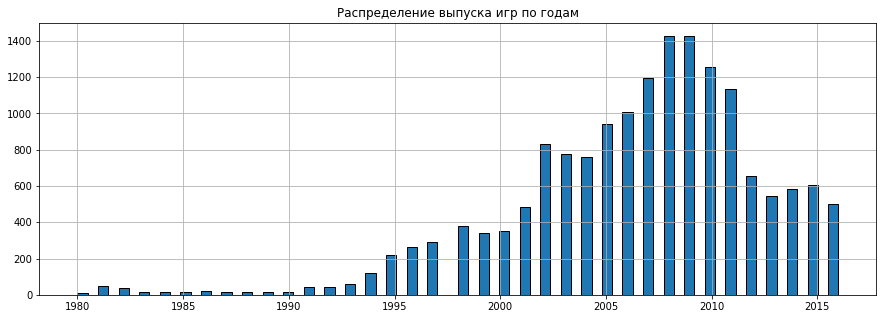

In [27]:
df['year_of_release'].hist(bins=74, figsize=(15,5), ec='black');
plt.title('Распределение выпуска игр по годам')
plt.show()

**Комментарий**

Первые игры начали выпускать в 80-х. До 90 года игр выпускалось крайне мало. В 1990 году появилась первая ОС (Windows 3.0) с графическим интерфейсом. Возможно, это послужило толчком к развитию индустрии игр, та как после 90 года видна намечающаяся тенденция роста количества компьютерных игр. Пока что еще мощности ПК малы, но начиная с 95 года начинается бурный рост. И так до 2009 года. После начался спад, возможно это связано с насыщением рынка и развитием мобильных телефонов, которые здесь не отражены.

Согласно исходных условий мы прогнозируем кампанию на 2017 год. Игры слишком быстро приобретают и теряют популярность. Думаю, что актуальный период для прогноза - не ранее 2012 года. Плюс-минус 5 лет достаточный срок для "жизни" игры. (если не брать в расчёт мега популярные хиты).

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [28]:
df.groupby('platform').agg({'total_sales': 'sum'}).sort_values(by='total_sales', ascending=False).T

platform,PS2,X360,PS3,Wii,DS,PS,PS4,GBA,PSP,3DS,PC,GB,XB,NES,N64,SNES,GC,XOne,2600,WiiU,PSV,SAT,GEN,DC,SCD,NG,WS,TG16,3DO,GG,PCFX
total_sales,1233.56,961.24,931.34,891.18,802.78,727.58,314.14,312.88,289.53,257.81,255.76,254.43,251.57,251.05,218.01,200.04,196.73,159.32,86.48,82.19,53.81,33.59,28.35,15.95,1.86,1.44,1.42,0.16,0.1,0.04,0.03


In [29]:
#df[df['platform']=='PS2'].hist('year_of_release', bins=11, figsize=(15,5), ec='black');

In [30]:
plf = df.groupby('platform')['total_sales'].sum().sort_values().reset_index()
pop_platforms = plf.loc[17:30, 'platform'].values

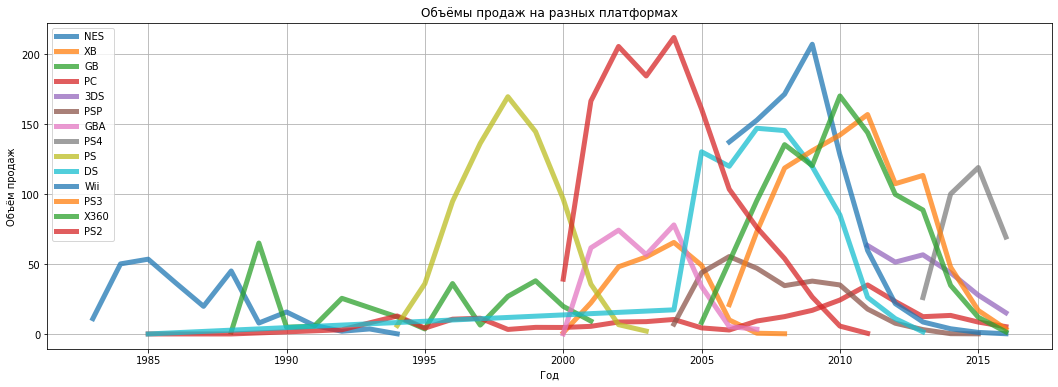

In [31]:
plt.figure(figsize=(18, 6))
plt.grid()
plt.title('Объёмы продаж на разных платформах')

for i in range(0, len(pop_platforms)):
    platform  = df.query('platform == @pop_platforms[@i]').groupby('year_of_release')['total_sales'].sum()
    platform.plot(x=platform.index, y=platform.values, label=pop_platforms[i], linewidth=5, alpha=0.75, grid=True);
plt.xlabel('Год')    
plt.ylabel('Объём продаж')
plt.legend()
plt.show();

**Вывод**

Средняя продолжительность жизни платформы - 10 лет. Особенно хорошо это видно на примере платформ от Sony. Каждое поколение "живет" примерно 10 лет.

Самые долгоживущие платформы - PC, DS.

**Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.**

**Не учитывайте в работе данные за предыдущие годы.**

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

Актуальным периодом будем считать данные с 2013 года, так как игровая индустрия быстро развивается и не стоит на месте.

In [32]:
df_05 = df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').\
    query('year_of_release>2012').fillna(0).reset_index()
df_05['year_of_release'] = df_05['year_of_release'].astype('Int64')

for column in df_05.columns:
    if df_05[column].sum()==0:
        df_05.drop(column, axis=1,inplace=True)

display(df_05)

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
1,2014,43.76,0.00,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2,2015,27.78,0.00,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
3,2016,15.14,0.00,5.25,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


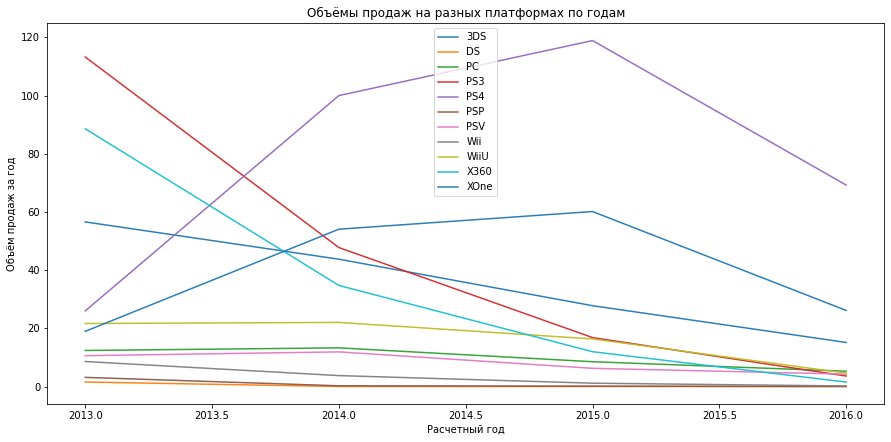

In [33]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title('Объёмы продаж на разных платформах по годам')

i=0
for column in df_05.columns[1:]:
    plt.plot(df_05['year_of_release'].to_list(), df_05[column].to_list(), label=column, alpha=0.95);
    i+=1 # В верхней строчке выдает ошибку

plt.grid()
plt.xlabel('Расчетный год')    
plt.ylabel('Объём продаж за год')
plt.legend()
plt.show();

**Вывод**



Из представленного выше графика видно, что многие платформы уже давно прошли свой пик популярности и сейчас продажи близятся к нулю. Это такие платформы как Wii, DS, PS2, PS3, PSP, X360. Очевидно что на эти платформы делать ставку смысла нет.

Более-менее нам будут интересны PS4 и XOne. Видно что эти платформы прошли свой пик популярности, хоть и не дошли до середины жизненного цикла. Кроме того других альтернатив просто нет, за исключением платформы PC. 

Платформа РС - это стабильная платформа, у которой есть свои абсолютные приверженцы. Продажи относительно других платформ маленькие, но зато они есть всегда.


**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

Создадим список самых прибыльных платформ с 2011 года.

In [34]:
top2005 = df.query('year_of_release>=2012').groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(10)
top2005

,platform,total_sales
0,PS4,314.14
1,PS3,288.79
2,X360,236.54
3,3DS,194.61
4,XOne,159.32
5,WiiU,82.19
6,PC,62.65
7,PSV,49.18
8,Wii,35.37
9,DS,12.55


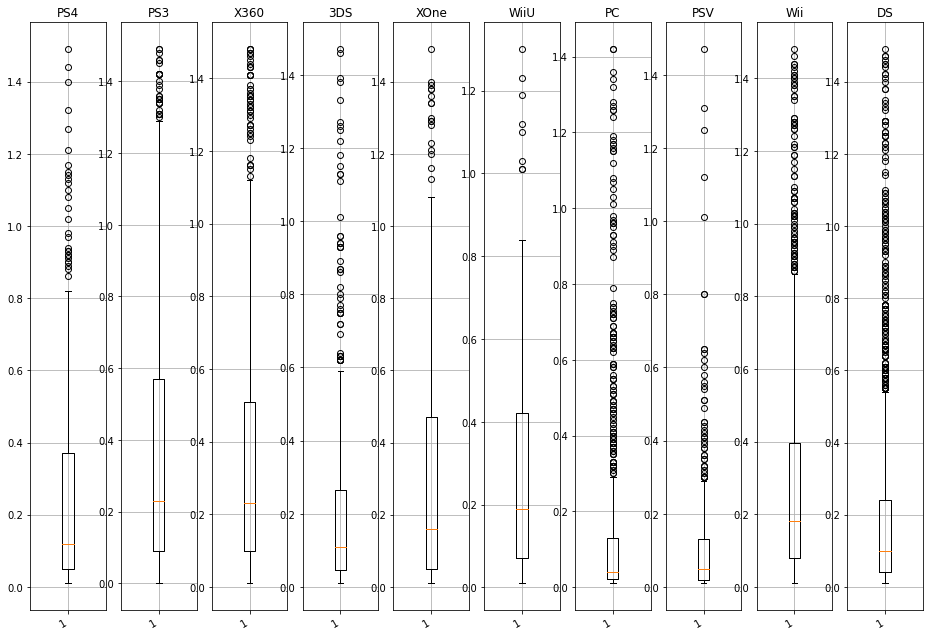

In [35]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(nrows=1, ncols=10, figsize=(16, 12))
fig.autofmt_xdate();

p = {ax1:'PS4', ax2:'PS3', ax3:'X360', ax4:'3DS', ax5:'XOne', ax6:'WiiU', ax7:'PC', ax8:'PSV', ax9:'Wii', ax10:'DS'}
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    total_sales = df.query('platform==@p[@ax] and total_sales<1.5')['total_sales']
    ax.boxplot(total_sales)
    ax.grid()
    ax.set_title(p[ax])
       
fig.autofmt_xdate()

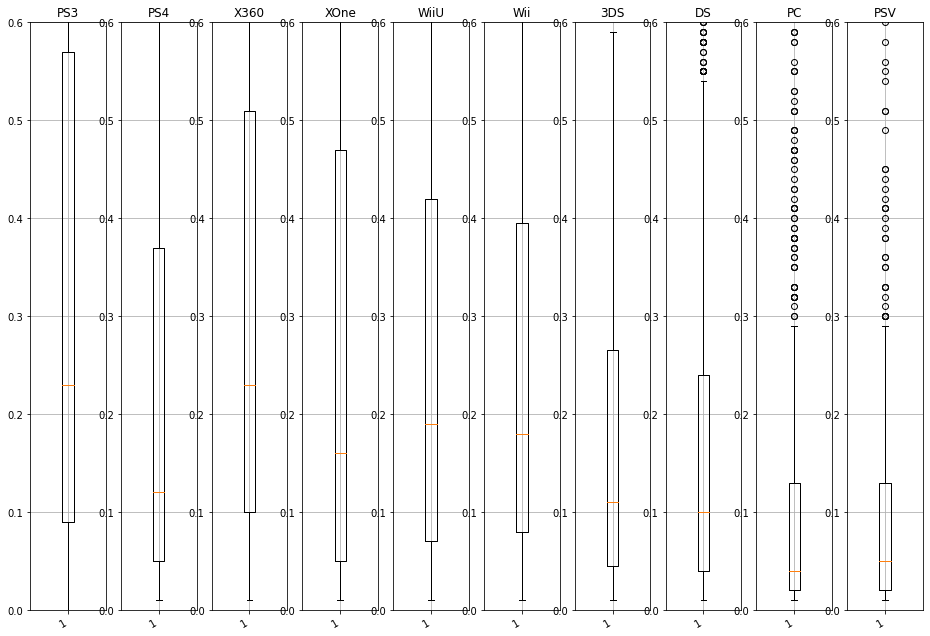

In [36]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(nrows=1, ncols=10, figsize=(16, 12))
fig.autofmt_xdate();

p = {ax1:'PS3', ax2:'PS4', ax3:'X360', ax4:'XOne', ax5:'WiiU', ax6:'Wii', ax7:'3DS', ax8:'DS', ax9:'PC', ax10:'PSV'}
for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]:
    total_sales = df.query('platform==@p[@ax] and total_sales<1.5')['total_sales']
    ax.boxplot(total_sales)
    ax.grid()
    ax.set_title(p[ax])
    ax.set_ylim([0, 0.6])
    
fig.autofmt_xdate() 

**Вывод**

PS3, X360, XOne в разрезе актуального периода с 2013 года смотрятся наиболее интересно. За ними следуют Wii, WiiU. Потом PS4, но это новая платформа, ей будет еще что продавать. Затем идут азиатские "эксклюзивы" 3DS, DS. Замыкают шествие PSV, вытесняемая мобильными играми, и PC - со своими преданными фанатами.

**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**


Для анализа выберем платформу PS3. На мой взгляд это будет наиболее наглядным примером, так PlayStation давно на рынке, сменила несколько поколений и не собирается останавляиваться на достигнутом.

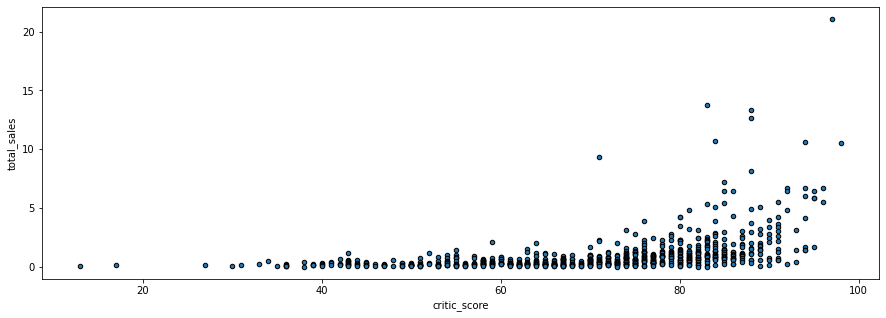

In [37]:
ps_3 = df[(df['platform'] == 'PS3') & (df['critic_score'] > 0)].copy()
ps_3.plot(kind='scatter', x='critic_score', y='total_sales', ec='black', figsize=(15,5));

Чем выше оценка критиков, тем больше продаж. Выглядит логично.

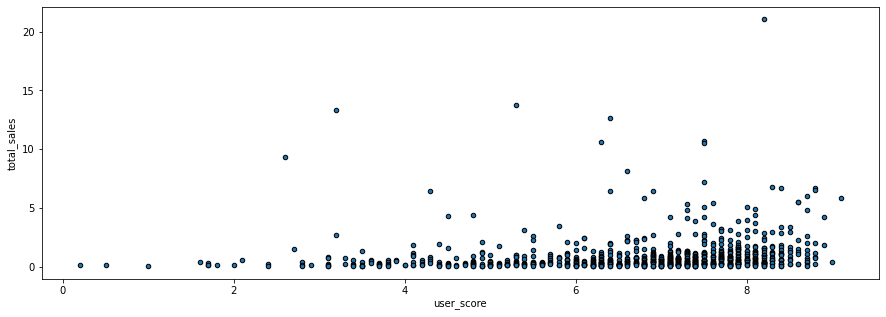

In [38]:
ps_3 = df[(df['platform'] == 'PS3') & (df['user_score'] > 0)].copy()
ps_3.plot(kind='scatter', x='user_score', y='total_sales', ec='black', figsize=(15,5));

Тут так же прослеживается схожая закономерность, чем выше оценка, тем больше продаж. Но так же есть примеры с большим количестом продаж и небольшим рейтингом. Например, такую картину могут давать предзаказы. Т.е.человек оплатил и ждет, а после выпуска игры остается разочарованным и ставит низкую оценку.

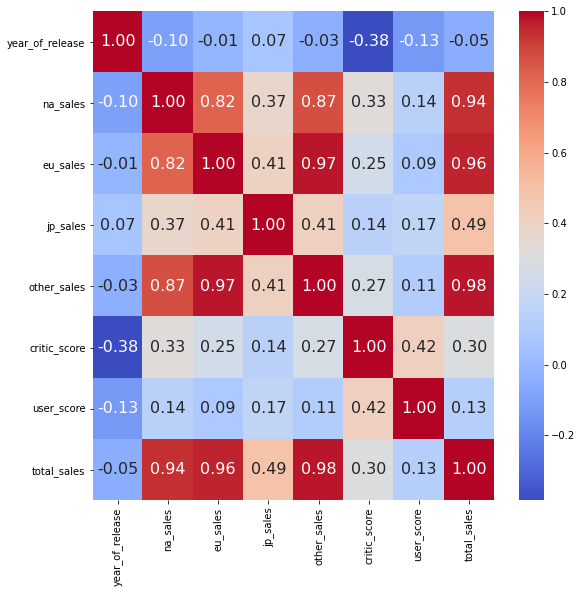

In [39]:
plt.figure(figsize=(9,9))
sns.heatmap(ps_3.corr(), annot=True, cmap="coolwarm", fmt='.2f', annot_kws={'size':16});

**Вывод** 

Можно увидеть слабую положительную корреляцию между отзывами критиков и продажами (0,3), очень слабо на продажи влияют отзывы пользователей.

**Соотнесите выводы с продажами игр на других платформах.**


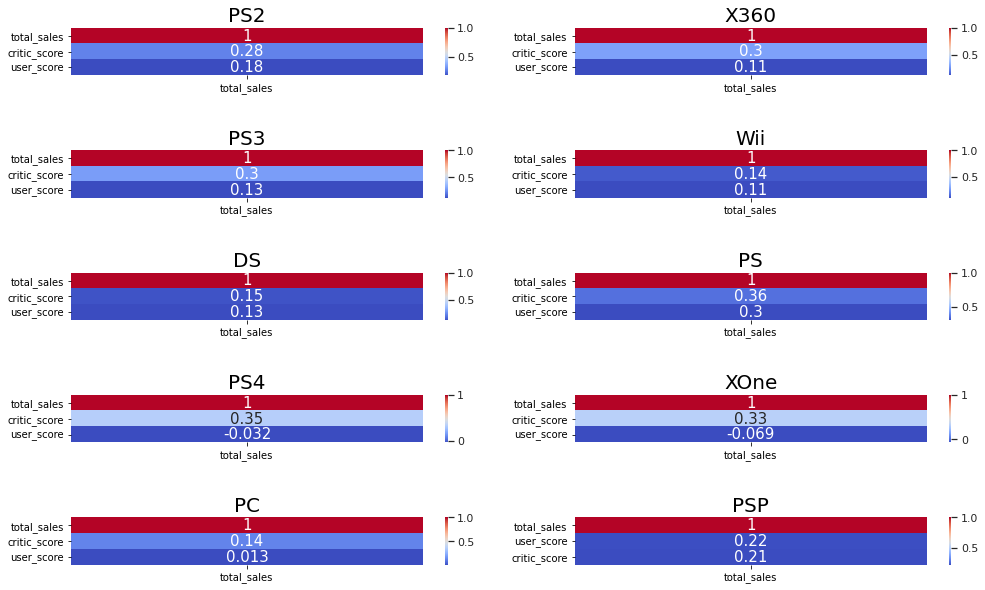

In [40]:
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'XOne', 'PC', 'PSP']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,9))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = df[(df['platform'] == curr_platform) & (df['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="coolwarm", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1


**Вывод** 

В общем и целом данные по корреляции между отзывами и количеством продаж совпадают по всем популярным платформам. За исключением Wii, DS, PC. Так же выделяются PS4 и XOne, но это платформы относительно новые и пользователи, возможно еще не успели оставить достаточное количество отзывов.

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

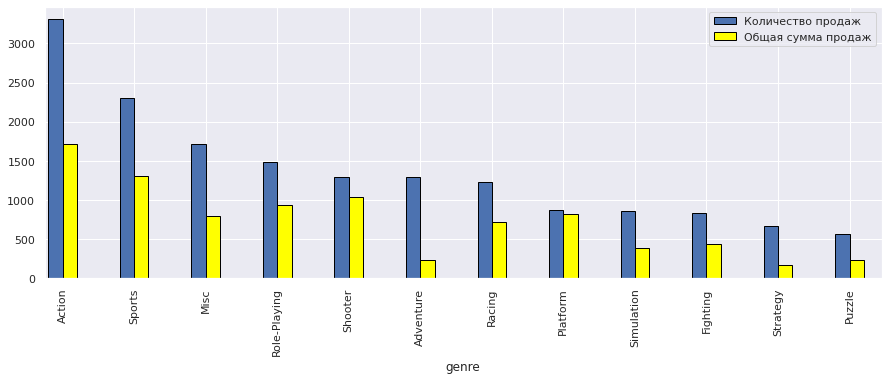

In [41]:
ax = plt.gca()

dfdf = df.groupby('genre').agg({'name': 'count', 'total_sales': 'sum', }).sort_values(by='name', ascending=False)

plot_1 = dfdf['name']
plot_1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, position=1)

plot_2 = dfdf['total_sales']
plot_2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='yellow', position=0)


ax.legend(['Количество продаж', 'Общая сумма продаж', ]);

In [42]:
genre_pivot=df.pivot_table('total_sales', 
                index = 'genre', 
                aggfunc = ['sum','count','median'])
                           
genre_pivot

,sum,count,median
,total_sales,total_sales,total_sales
genre,,,
Action,1716.52,3307,0.19
Adventure,233.33,1293,0.05
Fighting,442.66,837,0.21
Misc,790.29,1721,0.16
Platform,825.55,878,0.27
Puzzle,239.89,569,0.10
Racing,723.49,1226,0.19
Role-Playing,931.08,1481,0.18


**Вывод**

ТОП-3 жанров по количеству проданных копий: Action, Sports, Misc. 

ТОП-3 жанров по общей сумме продаж: Action, Sports, Shooter.

Можно сказать, что популярные игры - это активные, "быстрые" игры, требующие быстрой реакции от игрока.

Игры требующие внимания и усидчивости, напротив, в конце списка. Это Puzzle, Strategy.


## Шаг. Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [43]:
# функция рисует графики топ платформ по регионам

def top_reg_plot(groupby, region_sales, ax):
    pt = df.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'yellow', 'jp_sales': 'green'}
    plot = pt.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

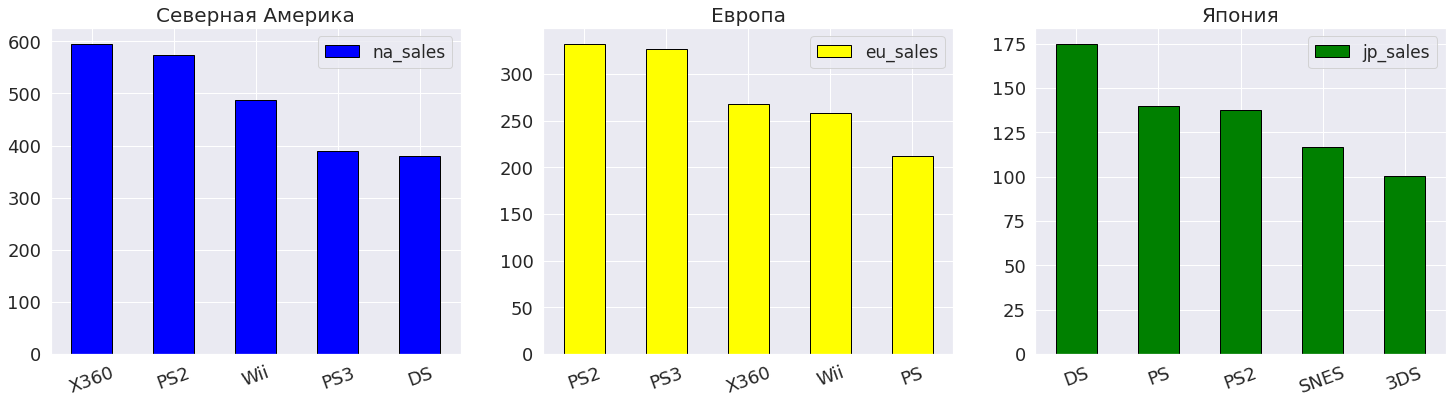

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_reg_plot('platform', 'na_sales', 0)
top_reg_plot('platform', 'eu_sales', 1)
top_reg_plot('platform', 'jp_sales', 2)

Северная Америка:

1-е место - Х360. С небольшим отрывом PS2. На 3-ем месте Wii. 4е место PS3. 5ое место - DS.
 
Европа:

Практически вровень PS2 и PS3, за ними Х360. Потом Wii и PS.

Япония:

В этой стране свои вкусы. 1-е место - карманный Nintendo. Затем Sony Playstation. Потом PS2, SNES и 3DS.

ИТОГО: АМериканский рынок самый большой, он похож на европейский в части лидеров. А вот японский рынок самый маленький и со своими вкусами.

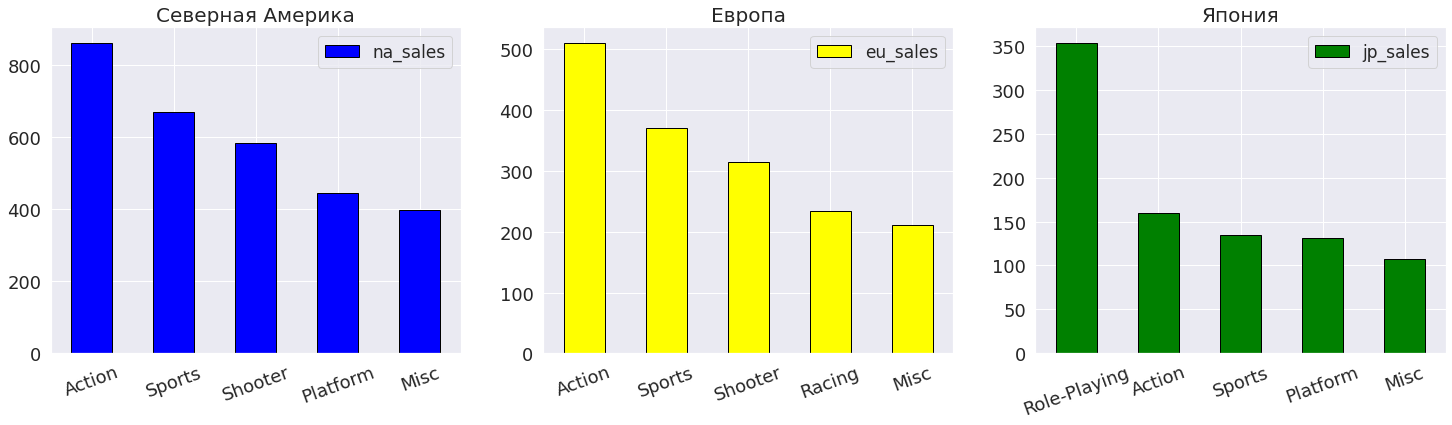

In [45]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_reg_plot('genre', 'na_sales', 0)
top_reg_plot('genre', 'eu_sales', 1)
top_reg_plot('genre', 'jp_sales', 2)

В Северной Америке и Европе в лидерах экшн, спорт и шутер. В Северной Америке более популярны платформеры, в Европе - гонки.

Япония опять удивляет - РПГ с большим отрывом опережают остальные жанры. Зато потом все как у всех: экшены и спортивные игры.

In [46]:
popul_5platf_dict = {}
for region in ['na_sales', 'eu_sales', 'jp_sales']:
    popul_5platf_dict[region] = df.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
popul_5platf_dict


{'na_sales': platform
 X360    595.74
 PS2     572.92
 Wii     486.87
 PS3     390.13
 DS      380.31
 Name: na_sales, dtype: float64,
 'eu_sales': platform
 PS2     332.63
 PS3     327.21
 X360    268.32
 Wii     258.32
 PS      212.39
 Name: eu_sales, dtype: float64,
 'jp_sales': platform
 DS      175.02
 PS      139.78
 PS2     137.54
 SNES    116.55
 3DS     100.62
 Name: jp_sales, dtype: float64}

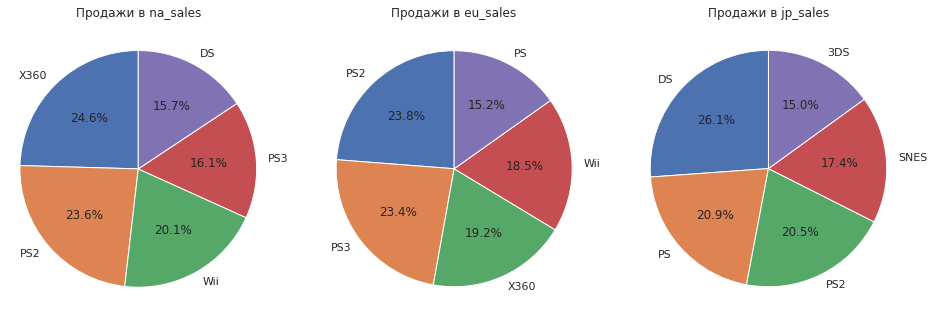

In [47]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))
fig.autofmt_xdate();

i = 0
x = [ax1, ax2, ax3]
region = ['na_sales', 'eu_sales', 'jp_sales']
explode = (0.15, 0, 0, 0, 0)

for i in [0,1,2]:
    labels = popul_5platf_dict[region[i]].index
    sizes = popul_5platf_dict[region[i]].values
    ax = x[i]
    ax.set_title(f'Продажи в {region[i]}')
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90) 
    ax.axis('equal')  

plt.show()


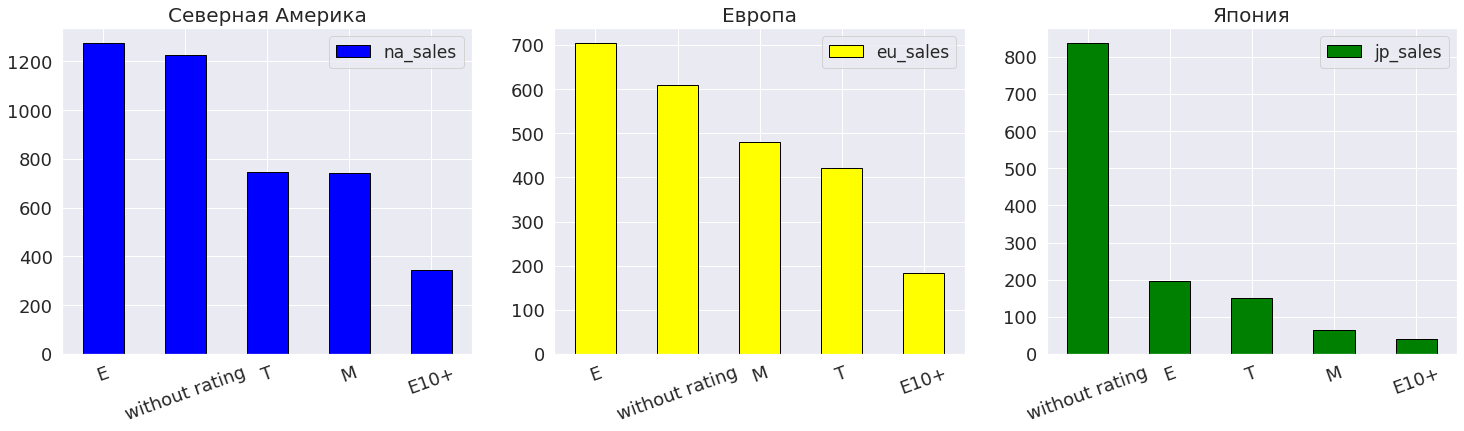

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_reg_plot('rating', 'na_sales', 0)
top_reg_plot('rating', 'eu_sales', 1)
top_reg_plot('rating', 'jp_sales', 2)

In [49]:
df['rating'].unique()

array(['E', 'without rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

По данным википедии буквенные обозначения рейтинга можно расшифровать следующим образом:
- E - («Everyone») — «Для всех»
- M - («Mature») — «Для взрослых»
- T - («Teen») — «Подросткам»
- E10+ - («Everyone 10 and older») — «Для всех от 10 лет и старше»
- K-A - нет информации.
- AO - («Adults Only 18+») — «Только для взрослых»
- EC - («Early childhood») — «Для детей младшего возраста»
- RP - («Rating Pending») — «Рейтинг ожидается»

https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

In [50]:
df['rating'].value_counts()

without rating    6676
E                 3921
T                 2905
M                 1536
E10+              1393
EC                   8
K-A                  3
AO                   1
RP                   1
Name: rating, dtype: int64

**Вывод**

Честно говоря, ответить на вопрос "Влияет ли рейтинг ESRB на продажи в отдельном регионе?" с помощью имеющихся данных невозможно. Нужно же с чем-то сравнивать, проводить полноценные длительные исследования и т.д. и т.п.

Но можно сравнить продажи в разных регионах учитывая рейтинг ESRB.

Итак,

столбец 'without rating' не берем в расчет, хоть он и занимает лидирующие позиции.

Во всех трех регионах на первом месте по продажам игры "Для всех". В Северной Америке игры для взрослых и подростков по популярности находятся на одном уровне. В Европе с небольшим отрывом игры для взрослых опережают игры для подростков. 2-е и 3-е место соответственно. В Японии же игры для подростков в два раза более популярны, чем игры для взрослых.

## Шаг. Проверьте гипотезы
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотез следует использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы.

Определим пороговое значение alpha = 0.05

**Гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Н0 - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [51]:
xone = df[(df['platform'] == 'XOne') & (df['user_score'] > 0)]['user_score']
pc = df[(df['platform'] == 'PC') & (df['user_score'] > 0)]['user_score']
stat, p = ttest_ind(xone, pc)

print('t = {}\np-value = {:.10e}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = -4.38289526334195
p-value = 1.3037979620e-05

Пороговое значение alpha = 0.05


**Вывод**

Мы получили значимые различия и не можем принять нулевую гипотезу. Значит, рейтинги платформ отличаются.

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

Н0 - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.

In [52]:
action = df[(df['genre'] == 'Action') & (df['user_score'] > 0)]['user_score']
sports = df[(df['genre'] == 'Sports') & (df['user_score'] > 0)]['user_score']
stat, p = ttest_ind(action, sports)

print('t = {}\np-value = {:.4f}'.format(stat, p))
print('\nПороговое значение alpha = 0.05')

t = 1.8472797735322193
p-value = 0.0648

Пороговое значение alpha = 0.05


**Вывод** 

Отвергнуть нулевую гипотезу не удалось. 

Значит средние пользовательские рейтинги одинаковы.

## Шаг. Напишите общий вывод

Первые игры начали выпускать в 80-х. До 90 года игр выпускалось крайне мало. В 1990 году появилась первая ОС (Windows 3.0) с графическим интерфейсом. Возможно, это послужило толчком к развитию индустрии игр, та как после 90 года видна намечающаяся тенденция роста количества компьютерных игр. Пока что еще мощности ПК малы, но начиная с 95 года начинается бурный рост. И так до 2009 года. После начался спад, возможно это связано с насыщением рынка и развитием мобильных телефонов, которые здесь не отражены.

Средняя продолжительность жизни платформы - 10 лет. Особенно хорошо это видно на примере платформ от Sony. Каждое поколение "живет" примерно 10 лет.

Самые долгоживущие платформы - PC, DS. PC - персональные компьютеры - "вечная классика". DS - "японская специфичность".

Нам будут интересны PS4 и XOne. Видно что эти платформы прошли свой пик популярности, хоть и не дошли до середины жизненного цикла. Кроме того других альтернатив просто нет.

Платформа РС - это стабильная платформа, у которой есть свои приверженцы. Продажи относительно других платформ маленькие, но зато они есть всегда.

ТОП-3 жанров по количеству проданных копий: Action, Sports, Misc. 
ТОП-3 жанров по общей сумме продаж: Action, Sports, Shooter.

Можно сказать, что популярные игры - это активные, "быстрые" игры, требующие быстрой реакции от игрока.

Во всех трех регионах на первом месте по продажам игры "Для всех". В Северной Америке игры для взрослых и подростков по популярности находятся на одном уровне. В Европе с небольшим отрывом игры для взрослых опережают игры для подростков. 2-е и 3-е место соответственно. В Японии же игры для подростков в два раза более популярны, чем игры для взрослых.

**ИТОГ**

На основании выполненной работы для планирования кампании на 2017-й год я рекомендую делать ставку на:
- Консольные платформы PS4 и XOne. 
- Жанры Action, Sports, Shooter (в порядке убывания)
- Разрабатывать под рейтинг Е - («Everyone») — «Для всех»
- Ориентироваться в порядке убывания: Северная Америка, Европа, Азия.